Tamaño de la matriz: 59803 filas x 60 columnas
Primeros 10 valores de la primera fila: [0.0534728541970253, -0.0390271432697773, -0.09402713924646378, -0.004027144983410835, -0.05902714282274246, -0.004027144983410835, -0.054027143865823746, -0.011527144350111485, 0.09597285091876984, -0.12902714312076569]


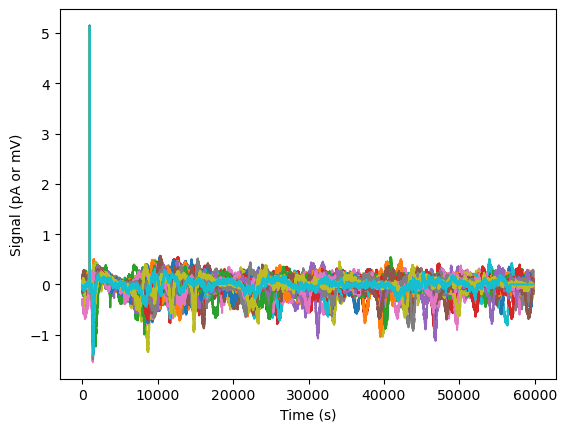

In [5]:
import grpc
import mat_service_pb2_grpc
import mat_service_pb2

import matplotlib.pyplot as plt
def run():
    with grpc.insecure_channel(
        'localhost:50051', 
                                        options=[
            ('grpc.max_receive_message_length', 100 * 1024 * 1024),  # 100 MB
            ('grpc.max_send_message_length', 100 * 1024 * 1024)  # 100 MB
        ]  # 100 MB
    ) as channel:
        stub = mat_service_pb2_grpc.MatServiceStub(channel)
        
        # Leer el archivo mat como bytes
        with open("m_Trials_selected.mat", "rb") as f:
            file_content = f.read()
        
        # Enviar el archivo al servidor
        response = stub.readMat(mat_service_pb2.MatRequest(file_content=file_content,field = "m_Trials_selected"))
        
        # Extraer la matriz de la respuesta
        matrix = [[num for num in vector.numbers] for vector in response.matrix]

        # Verificar el tamaño de la matriz
        print(f"Tamaño de la matriz: {len(matrix)} filas x {len(matrix[0])} columnas")
        print("Primeros 10 valores de la primera fila:", matrix[0][:10])

        # Graficar la primera fila (o cualquier otra fila) de la matriz
        plt.figure()
        plt.plot(matrix)  # Graficar la primera fila de la matriz
        plt.xlabel("Time (s)")
        plt.ylabel("Signal (pA or mV)")
        plt.show()

if __name__ == "__main__":
    run()
